In [27]:
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt

In [16]:
X_train = pd.read_csv("Train/x_train.csv").values
y_train = pd.read_csv("Train/y_train.csv").values

In [17]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
y_train = sc.transform(y_train)

In [18]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

In [19]:
X_train.shape

(1257, 1, 1)

In [20]:
y_train = y_train.reshape(-1,)

In [21]:
y_train.shape

(1257,)

In [24]:

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (None, 1)))

# Adding a second LSTM layer
regressor.add(LSTM(units = 64, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 64, return_sequences = True))

# Adding a fourth LSTM layer
regressor.add(LSTM(units = 3))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 64)          33024     
_________________________________________________________________
lstm_12 (LSTM)               (None, 3)                 816       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 83,764
Trainable params: 83,764
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fitting the RNN to the Training set
hist = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1257/1257 [==============================] - 5s 4ms/step - loss: 0.1949
Epoch 2/50
1257/1257 [==============================] - 0s 213us/step - loss: 0.0314
Epoch 3/50
1257/1257 [==============================] - 0s 232us/step - loss: 0.0053
Epoch 4/50
1257/1257 [==============================] - 0s 223us/step - loss: 0.0013
Epoch 5/50
1257/1257 [==============================] - 0s 209us/step - loss: 8.4892e-04
Epoch 6/50
1257/1257 [==============================] - 0s 213us/step - loss: 7.3097e-04
Epoch 7/50
1257/1257 [==============================] - 0s 235us/step - loss: 5.4468e-04
Epoch 8/50
1257/1257 [==============================] - 0s 210us/step - loss: 5.4118e-04
Epoch 9/50
1257/1257 [==============================] - 0s 211us/step - loss: 5.5466e-04
Epoch 10/50
1257/1257 [==============================] - 0s 212us/step - loss: 5.6040e-04
Epoch 11/50
1257/1257 [==============================] - 0s 220us/step - loss: 4.7672e-04
Epoch 12/50
1257/1257 [==============

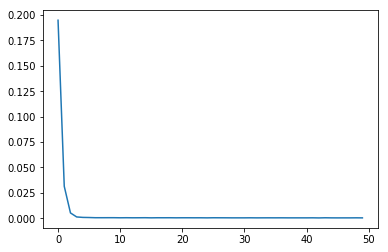

In [28]:
plt.plot(hist.history['loss'])
# plt.plot(hist.history[''])

In [29]:
# modelcheckpoint = ModelCheckpoint("best_model.h5",save_best_only=True)
# earlystop = EarlyStopping(patience=5 , monitor='val_loss',restore_best_weights=True)

# hist = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[modelcheckpoint,earlystop], shuffle=True, validation_split=0.2)

In [30]:
X_test = pd.read_csv("Test/x_test.csv").values

In [31]:
X_test = sc.transform(X_test)

In [32]:
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [33]:
X_test.shape

(19, 1, 1)

In [34]:
y_pred = regressor.predict(X_test)


In [35]:
y_pred = sc.inverse_transform(y_pred)

In [36]:
result = pd.DataFrame(y_pred, columns=['High'])

In [37]:
result.head()

,High
0,788.968018
1,790.665283
2,793.781616
3,807.095215
4,809.147888


In [38]:
result.to_csv("pred_.csv", index=False)

In [ ]:
XX_train = pd.read_csv("Train/x_train.csv").values
yy_train = pd.read_csv("Train/y_train.csv").values

In [ ]:
from sklearn.linear_model import LinearRegression
x = LinearRegression()

In [ ]:
x.fit(XX_train,yy_train)

In [ ]:
XX_test = pd.read_csv("Test/x_test.csv").values

In [ ]:
p = x.predict(XX_test)

In [ ]:
p.shape